##this 

In [5]:
import nltk
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the Vader lexicon (only need to do this once)
nltk.download('vader_lexicon')

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Sample customer reviews
reviews = [
    "This product is amazing! I'm really satisfied with it.",
    "The service was terrible. I wouldn't recommend it to anyone.",
    "Neutral feedback: The quality is decent, but the price is a bit high.",
]

# Perform sentiment analysis on each review
for review in reviews:
    sentiment_scores = sid.polarity_scores(review)
    
    # Determine sentiment label
    if sentiment_scores['compound'] > 0.05:
        sentiment_label = 'Positive'
    elif sentiment_scores['compound'] < -0.05:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    
    print(f"Review: {review}")
    print(f"Sentiment: {sentiment_label}")
    print(f"Sentiment Scores: Positive={sentiment_scores['pos']}, Negative={sentiment_scores['neg']}, Neutral={sentiment_scores['neu']}, Compound={sentiment_scores['compound']}")
    print()


Review: This product is amazing! I'm really satisfied with it.
Sentiment: Positive
Sentiment Scores: Positive=0.507, Negative=0.0, Neutral=0.493, Compound=0.8012

Review: The service was terrible. I wouldn't recommend it to anyone.
Sentiment: Negative
Sentiment Scores: Positive=0.0, Negative=0.427, Neutral=0.573, Compound=-0.6381

Review: Neutral feedback: The quality is decent, but the price is a bit high.
Sentiment: Neutral
Sentiment Scores: Positive=0.0, Negative=0.0, Neutral=1.0, Compound=0.0



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
df = pd.read_csv('Restaurant_Reviews.tsv', sep='\t')

# Display the DataFrame
df.head(20)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


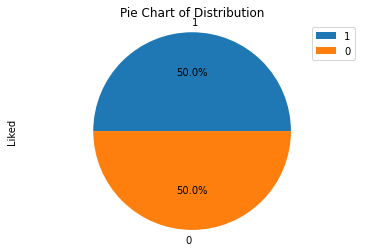

In [8]:
import matplotlib.pyplot as plt

# Calculate the value counts of the 'category' column
category_counts = df['Liked'].value_counts()


# Pie chart
plt.figure(figsize=(6, 4))
category_counts.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Pie Chart of Distribution')

# Add legend
plt.legend()

plt.show()

In [9]:
# How many reviews do we have?
print( df.shape[0], 'data in this dataset')

# Do we have duplicates?
print('Number of Duplicates:', len(df[df.duplicated()]))


1000 data in this dataset
Number of Duplicates: 4


In [10]:
# First, get all duplicate rows (keep=False ensures all duplicates are kept)
duplicate_rows = df[df.duplicated(keep=False)]

# Then sort the dataframe on all columns to ensure duplicates are adjacent
sorted_duplicates = duplicate_rows.sort_values(by=list(duplicate_rows.columns))

# Now, if we want to see 5 pairs of duplicates (10 rows), we can simply:
top_5_duplicate_pairs = sorted_duplicates.head(20)
top_5_duplicate_pairs

,Review,Liked
334,I love this place.,1
814,I love this place.,1
380,I won't be back.,0
843,I won't be back.,0
505,I would not recommend this place.,0
846,I would not recommend this place.,0
383,The food was terrible.,0
816,The food was terrible.,0


In [11]:
df = df.drop_duplicates()
print(len(df[df.duplicated()]))

0


In [12]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score



# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Lists to store predicted sentiment labels and true labels
predicted_sentiments = []
true_labels = df['Liked'].tolist()
reviews = df['Review'].tolist()
# Adjusted threshold
threshold = 0.1

for index, row in enumerate( reviews):
    review = row
    sentiment_scores = sid.polarity_scores(review)
    
    # Determine sentiment label
    if sentiment_scores['compound'] > threshold:
        sentiment_label = 1  # Positive
    elif sentiment_scores['compound'] < -threshold:
        sentiment_label = 0  # Negative
    else:
        sentiment_label = 0 if sentiment_scores['neg'] > sentiment_scores['pos'] else 1  # Neutral
    
    predicted_sentiments.append(sentiment_label)

#     print(f"Review: {review}")
#     print(f"Predicted Sentiment: {sentiment_label}")
#     print(f"True Sentiment: {true_labels[index]}")
#     print(f"Sentiment Scores: Positive={sentiment_scores['pos']}, Negative={sentiment_scores['neg']}, Compound={sentiment_scores['compound']}")
#     print()

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_sentiments)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.72


In [14]:
import pandas as pd
from textblob import TextBlob
from sklearn.metrics import accuracy_score



# Lists to store predicted sentiment labels and true labels
predicted_sentiments = []
true_labels = df['Liked'].tolist()
reviews = df['Review'].tolist()
print(len(true_labels))
print(len(reviews))
for index, row in enumerate( reviews):
    

    review = row
    
    # Perform sentiment analysis using TextBlob
    analysis = TextBlob(review)
    sentiment_score = analysis.sentiment.polarity
    
    # Determine sentiment label
    sentiment_label = 1 if sentiment_score > 0 else 0
    
    predicted_sentiments.append(sentiment_label)

#     print(f"Review: {review}")
#     print(f"Predicted Sentiment: {sentiment_label}")
#     print(f"True Sentiment: {true_labels[index]}")
#     print(f"Sentiment Score: {sentiment_score:.2f}")
#     print()

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_sentiments)
print(f"Accuracy: {accuracy:.2f}")


996
996
Accuracy: 0.77
